In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from decodanda import Decodanda, generate_synthetic_data, visualize_synthetic_data

In [2]:
data = generate_synthetic_data(n_neurons=80, n_trials=30, keyA='stimulus', keyB='action', rateA=0.1, rateB=0, meanfr=0.05)

In [16]:
labelsA = np.random.rand(30) > 0.5

labelsA

array([False, False, False,  True, False, False,  True, False,  True,
       False, False, False,  True, False,  True,  True, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False])

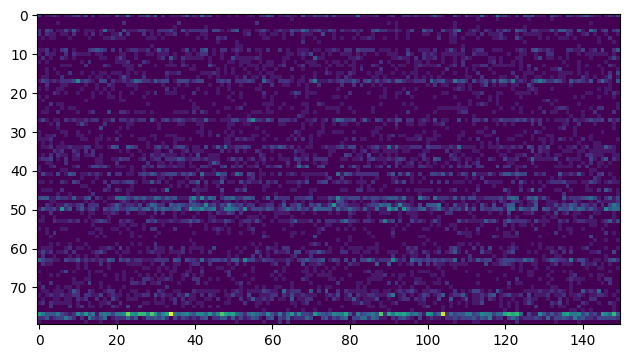

In [12]:
plt.imshow(np.transpose(data['raster']))

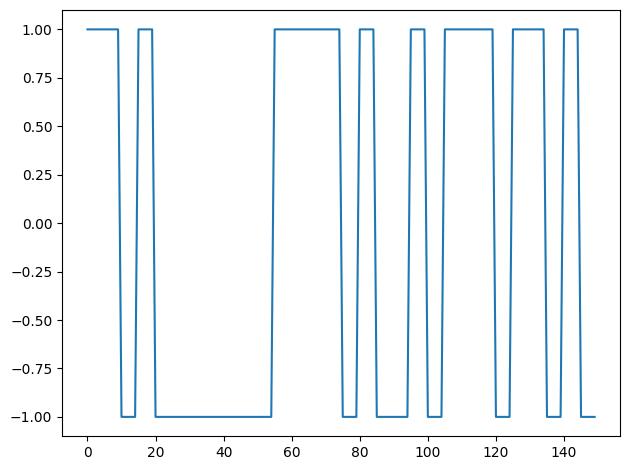

In [13]:
plt.plot(data['stimulus'])

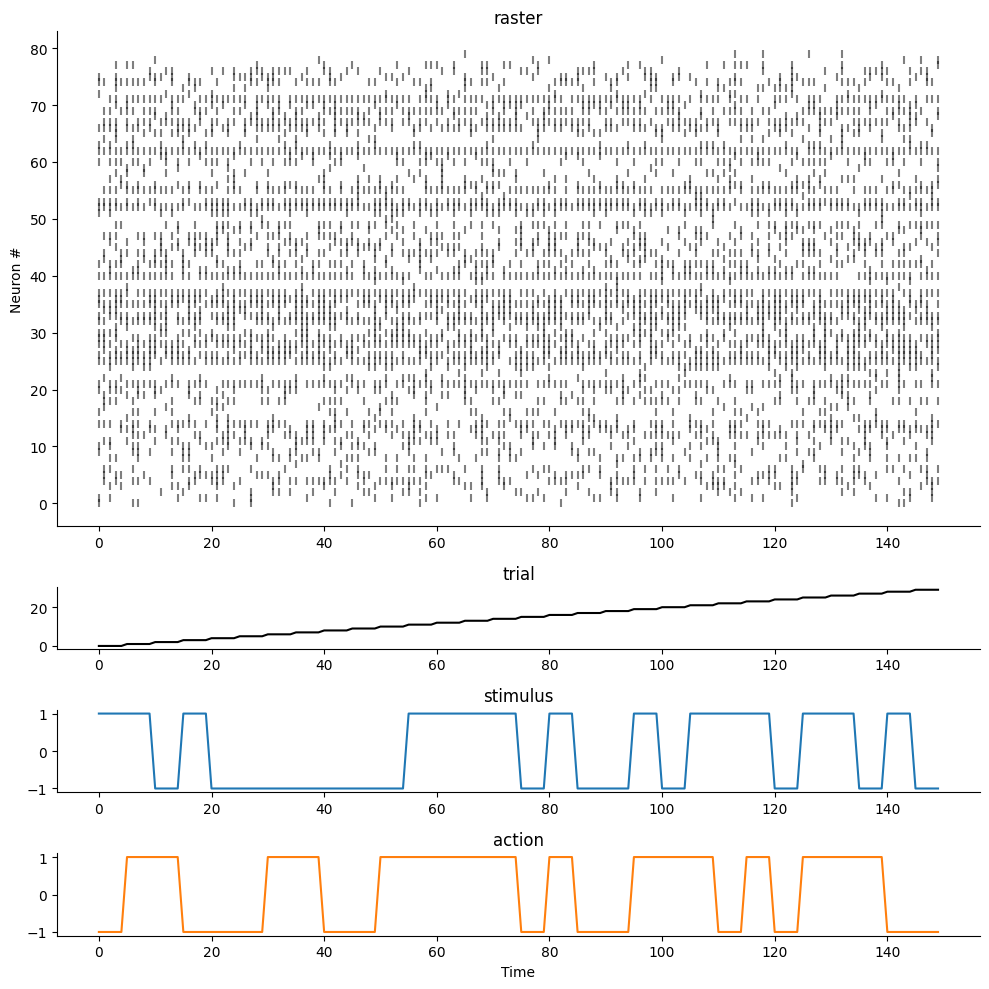

In [14]:
visualize_synthetic_data(data)

In [17]:
import inspect

inspect.getfile(Decodanda)

'C:\\Users\\RAS\\PycharmProjects\\decodanda\\decodanda\\classes.py'

In [18]:
# Create a decodanda object by applying these conditions to the data

# Decodanda-object is a class-instance with a lot of kwargs

# plus functions, incl: the _train, _test, decode_dichotomy, CCGP_dichotomy, CCGP_with_nullmodel

conditions = {'stimulus': [-1, 1]}     # The conditions dictionary takes a simple one-variable structure.
# variable name^     values^

mydec = Decodanda(data=data,
                  conditions=conditions,
                  verbose=True)

		[Decodanda]	building conditioned rasters for session 0
			(stimulus = -1):	Selected 75 time bin out of 150, divided into 15 trials - 80 neurons
			(stimulus = 1):	Selected 75 time bin out of 150, divided into 15 trials - 80 neurons





Testing decoding performance for semantic dichotomy:  stimulus
[['1'], ['0']] 75

[decode_dichotomy]	Decoding - 75 time bins - 80 neurons - 1 brains
		(1)
			vs.
		(-1)


100%|██████████| 10/10 [00:00<00:00, 237.06it/s]



Looping over decoding cross validation folds:

[decode_with_nullmodel]	 data <p> = 0.78

[decode_with_nullmodel]	Looping over null model shuffles.


100%|██████████| 25/25 [00:01<00:00, 21.41it/s]


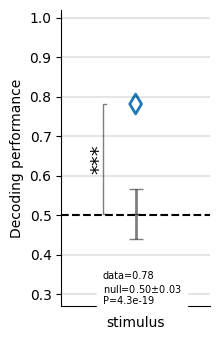

In [29]:
decoding_params = {
    'training_fraction': 0.7,       # fraction of trials used for training during cross validation
    'cross_validations': 10,        # number of different training-testing separations
    'nshuffles': 25,                # number of null model repetitions to compute significance
    'plot': True,                   # this generates a recap plot with performance, null model bars, and significance
}

data, null = mydec.decode(**decoding_params)

In [33]:
inspect.getfile(mydec.decode)

# line 1228

'C:\\Users\\RAS\\PycharmProjects\\decodanda\\decodanda\\classes.py'

TypeError: 'list' object is not callable